In [1]:
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from astropy.table import Table


import matplotlib.pyplot as plt
import numpy as np
import glob

from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd

In [2]:
files = glob.glob('C:/Users/oryan/Documents/weave-proj/figures/fits-files/Arp199/*.fits')

In [3]:
files

['C:/Users/oryan/Documents/weave-proj/figures/fits-files/Arp199\\frame-g-004002-4-0046.fits',
 'C:/Users/oryan/Documents/weave-proj/figures/fits-files/Arp199\\frame-i-004002-4-0046.fits',
 'C:/Users/oryan/Documents/weave-proj/figures/fits-files/Arp199\\frame-r-004002-4-0046.fits']

In [4]:
# g = fits.open(files[0])[0].data
# r = fits.open(files[2])[0].data
# i = fits.open(files[1])[0].data

In [5]:
def creating_mosiac(file_1, file_2):
    
    hdul_1 = fits.open(file_1)[0]
    hdul_2 = fits.open(file_2)[0]
    
    wcs_out, shape_out = find_optimal_celestial_wcs([hdul_1, hdul_2])
    
    hduls = [hdul_1[0], hdul_2[0]]
    
    array, _ = reproject_and_coadd(hduls, wcs_out, shape_out=shape_out, reproject_function = reproject_interp) 
    
    new_hdu = fits.PrimaryHDU(array, header = wcs_out.to_header())
    
    return new_hdu

In [6]:
if len(files) > 3.5:
    g_unaligned = creating_mosiac(files[0], files[1])
    r_unaligned = creating_mosiac(files[2], files[3])
    i_unaligned = creating_mosiac(files[4], files[5])
else:
    g_unaligned = fits.open(files[0])[0]
    r_unaligned = fits.open(files[2])[0]
    i_unaligned = fits.open(files[1])[0]

In [7]:
aligned_wcs = g_unaligned.header

In [8]:
g_aligned = g_unaligned.data
r_aligned, _ = reproject_interp(r_unaligned, aligned_wcs)
i_aligned, _ = reproject_interp(i_unaligned, aligned_wcs)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [9]:
hdu_g = fits.PrimaryHDU(g_aligned, header = g_unaligned.header)
hdu_r = fits.PrimaryHDU(r_aligned, header = g_unaligned.header)
hdu_i = fits.PrimaryHDU(i_aligned, header = g_unaligned.header)

hdul_g = fits.HDUList([hdu_g])
hdul_r = fits.HDUList([hdu_r])
hdul_i = fits.HDUList([hdu_i])

hdul_g.writeto('C:/Users/oryan/Documents/weave-proj/figures/fits-files/colour-files/Arp199_g.fits')
hdul_r.writeto('C:/Users/oryan/Documents/weave-proj/figures/fits-files/colour-files/Arp199_r.fits')
hdul_i.writeto('C:/Users/oryan/Documents/weave-proj/figures/fits-files/colour-files/Arp199_i.fits')

In [10]:
rbg_default = make_lupton_rgb(i_aligned, r_aligned, g_aligned, Q = 10, stretch = 0.5)

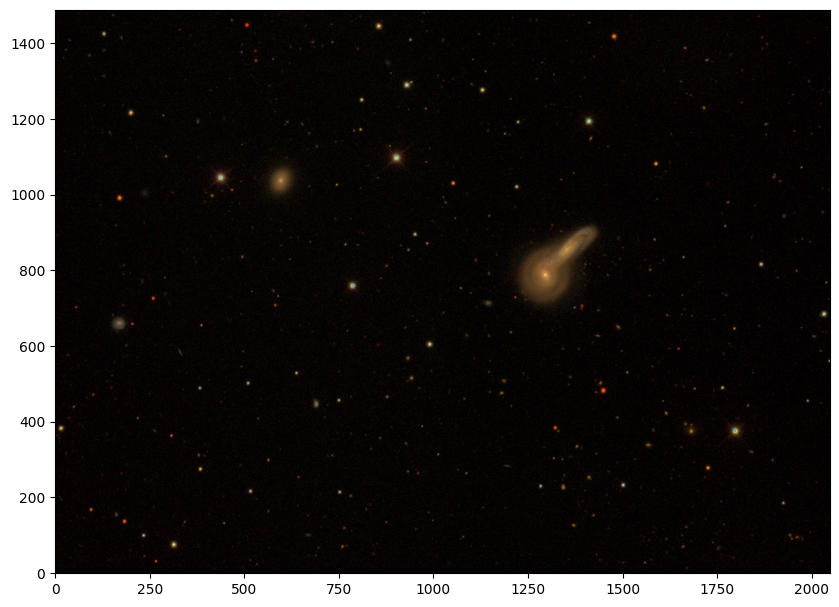

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(rbg_default, origin = 'lower')
plt.show()

In [13]:
hdu_new = fits.PrimaryHDU(rbg_default, header = g_unaligned.header)

In [14]:
hdul = fits.HDUList([hdu_new])

In [15]:
hdul.writeto('C:/Users/oryan/Documents/weave-proj/figures/fits-files/colour-files/NGC4320.fits')